# Employee Attrition Analysis and Prediction

In [1308]:
# Import Libraries
import pandas as pd
import numpy as np

In [1309]:
import warnings
warnings.filterwarnings('ignore')

In [1310]:
# Loading Data
data = pd.read_csv('Emp-Attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [1311]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## DATA PREPROCESSING

In [1312]:
# View dimensions of dataset
data.shape

(1470, 35)

In [1313]:
# View summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [1314]:
# Check for missing values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [1315]:
#checking for duplicte values
data.duplicated().value_counts()

False    1470
Name: count, dtype: int64

In [1316]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## EXPLORATORY DATA ANALYSIS (EDA)

In [1317]:
# overall attrition rate

data['Attrition'].value_counts(normalize=True) * 100

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

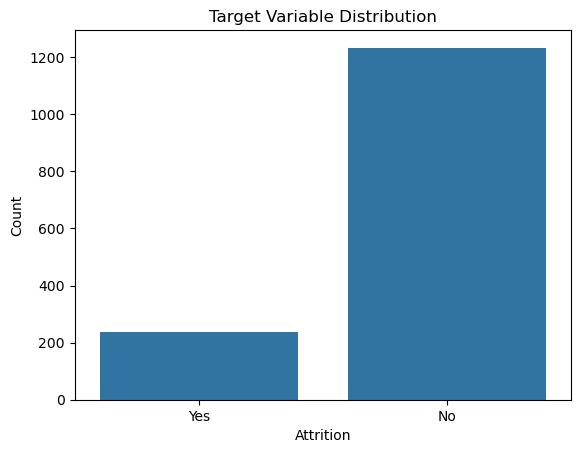

In [1318]:
# Target variable distribution (Attrition)

import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot
plt.figure()
sns.countplot(x ='Attrition', data=data)
plt.title("Target Variable Distribution")
plt.ylabel("Count")
plt.show()

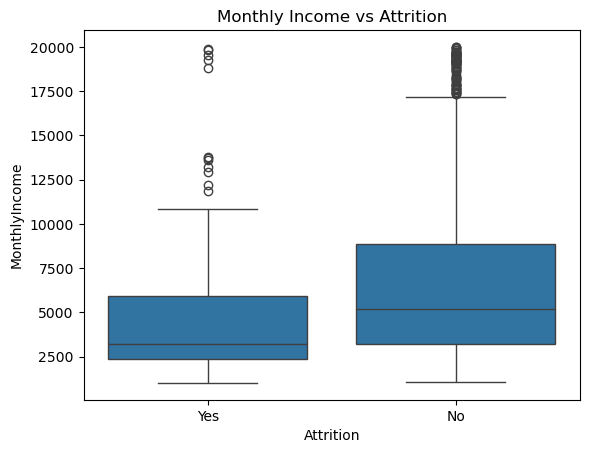

In [1319]:
# Monthly Income vs Attrition (Key Factor)

sns.boxplot(x='Attrition', y='MonthlyIncome', data=data)
plt.title('Monthly Income vs Attrition')
plt.show()

In [1320]:
data.groupby('Attrition')['MonthlyIncome'].mean()

Attrition
No     6832.739659
Yes    4787.092827
Name: MonthlyIncome, dtype: float64

#### Employees with lower monthly income showed higher attrition, indicating salary as a strong influencing factor.

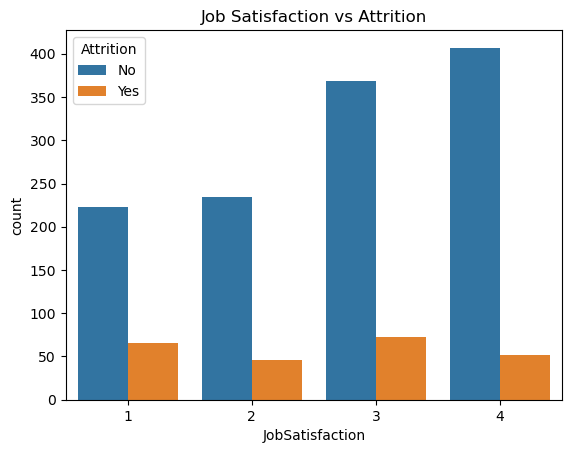

In [1321]:
# Job Satisfaction vs Attrition 

sns.countplot(x='JobSatisfaction', hue='Attrition', data=data)
plt.title('Job Satisfaction vs Attrition')
plt.show()

In [1322]:
pd.crosstab(data['JobSatisfaction'], data['Attrition'], normalize='index') * 100

Attrition,No,Yes
JobSatisfaction,,
1,77.162630,22.837370
2,83.571429,16.428571
3,83.484163,16.515837
4,88.671024,11.328976


#### Lower job satisfaction levels had significantly higher attrition percentages

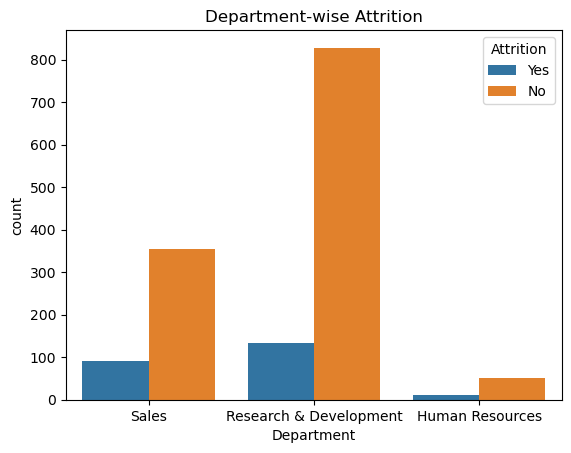

In [1323]:
# Department vs Attrition

sns.countplot(x='Department', hue='Attrition', data=data)
plt.title('Department-wise Attrition')
plt.show()

In [1324]:
pd.crosstab(data['Department'], data['Attrition'], normalize='index') * 100

Attrition,No,Yes
Department,,
Human Resources,80.952381,19.047619
Research & Development,86.160250,13.839750
Sales,79.372197,20.627803


#### The Sales department showed higher attrition compared to HR and R&D

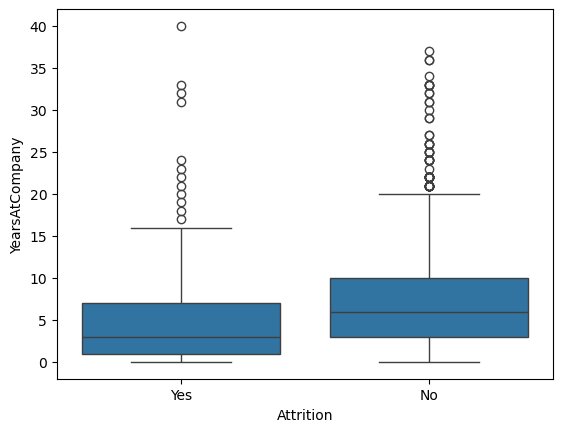

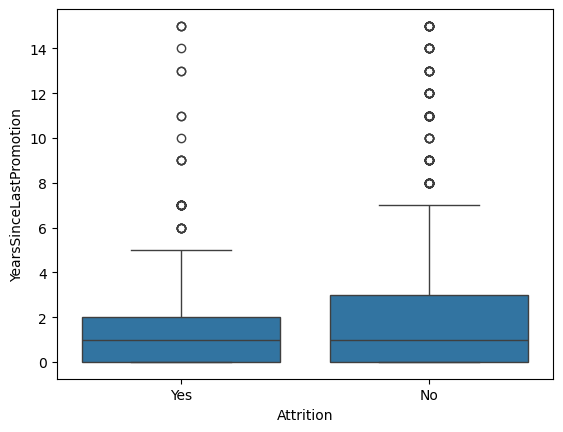

In [1325]:
# Work Experience & Growth Factors

sns.boxplot(x='Attrition', y='YearsAtCompany', data=data)
plt.show()

sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=data)
plt.show()


#### Employees with long gaps since last promotion were more likely to leave.

In [1326]:
# Target 

data['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [1327]:
data['Attrition'] = data['Attrition'].replace(['Yes','No'], [1,0])
data['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

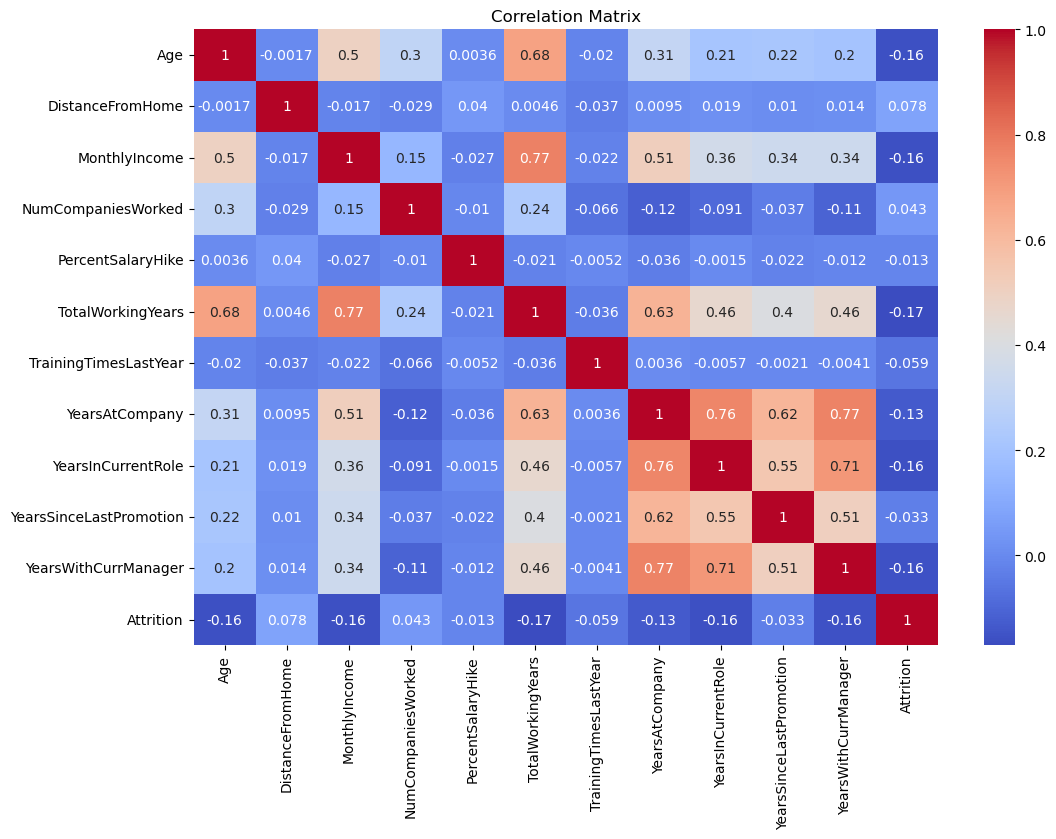

In [1328]:
# Correlation Analysis (Numerical Features)

numerical_cols = ['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked',
                  'PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany',
                  'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

corr_matrix = data[numerical_cols + ['Attrition']].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()


#### Attrition shows a negative correlation with income, age, experience, and tenure-related features, indicating that senior and well-paid employees are less likely to leave

In [1329]:
# Categorical Features

cat_cols = ['JobRole','OverTime','MaritalStatus','BusinessTravel']

for col in cat_cols:
    print(pd.crosstab(data[col], data['Attrition'], normalize='index') * 100)


Attrition                          0          1
JobRole                                        
Healthcare Representative  93.129771   6.870229
Human Resources            76.923077  23.076923
Laboratory Technician      76.061776  23.938224
Manager                    95.098039   4.901961
Manufacturing Director     93.103448   6.896552
Research Director          97.500000   2.500000
Research Scientist         83.904110  16.095890
Sales Executive            82.515337  17.484663
Sales Representative       60.240964  39.759036
Attrition          0          1
OverTime                       
No         89.563567  10.436433
Yes        69.471154  30.528846
Attrition              0          1
MaritalStatus                      
Divorced       89.908257  10.091743
Married        87.518574  12.481426
Single         74.468085  25.531915
Attrition                  0          1
BusinessTravel                         
Non-Travel         92.000000   8.000000
Travel_Frequently  75.090253  24.909747
Trav

#### Employees working overtime and frequent travelers showed higher attrition.

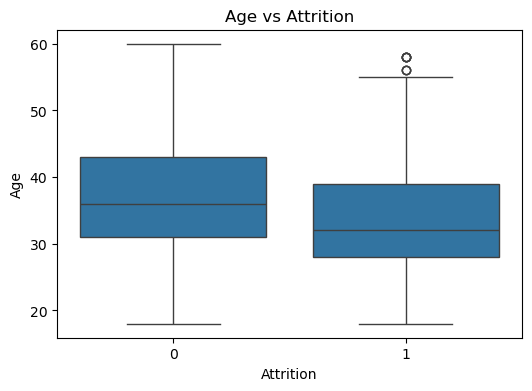

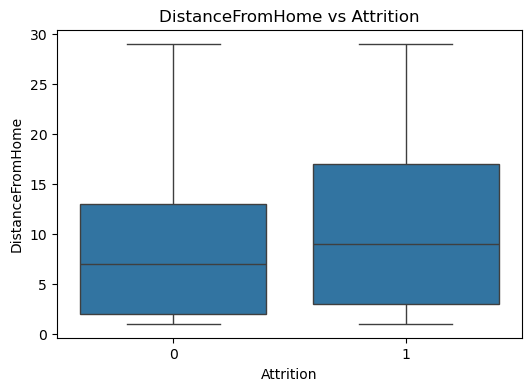

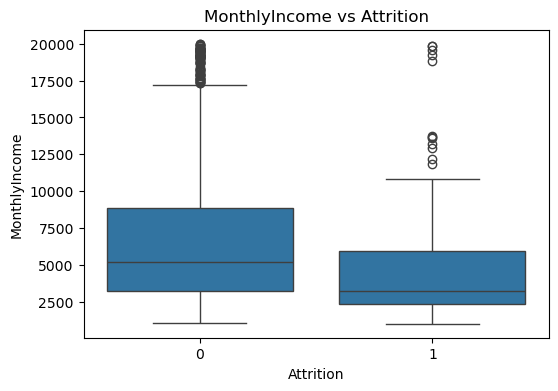

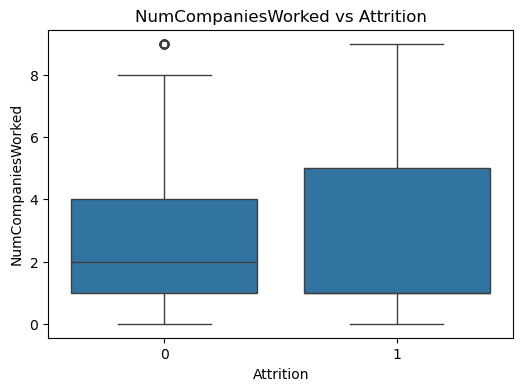

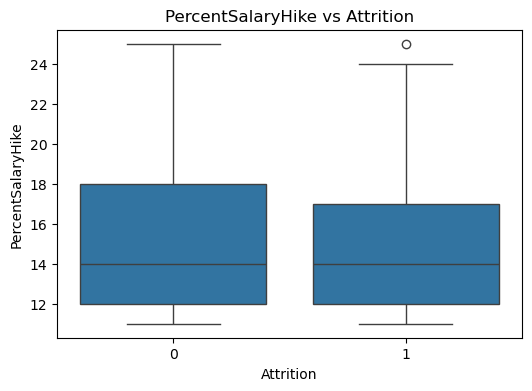

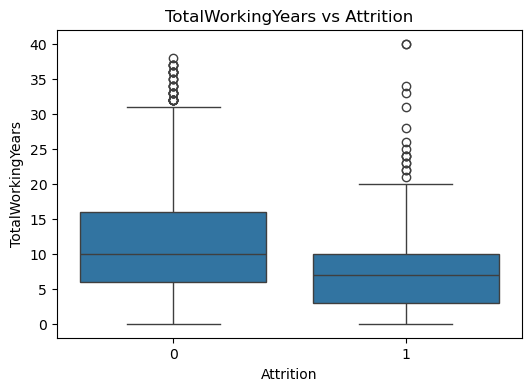

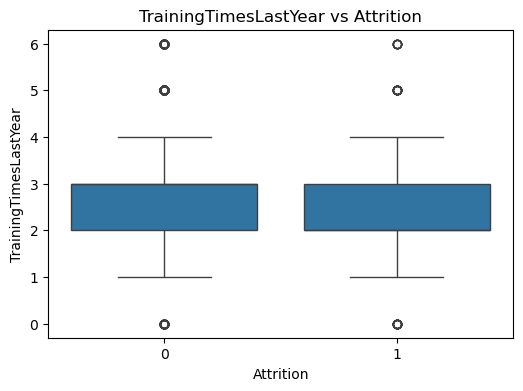

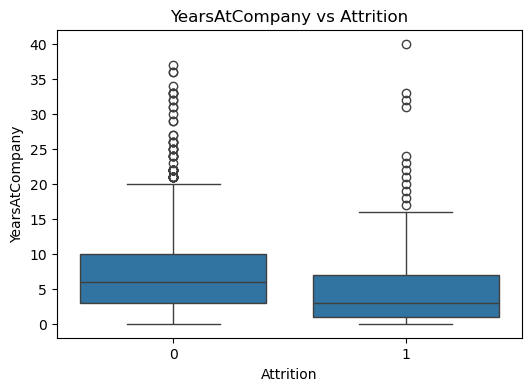

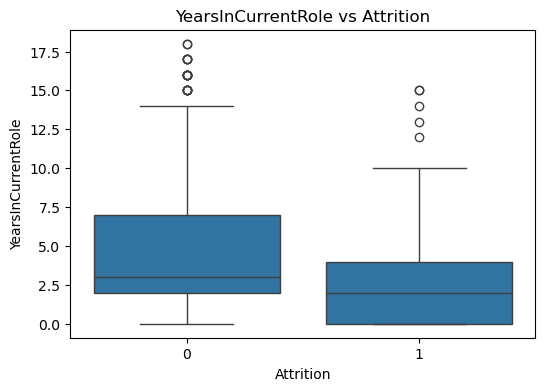

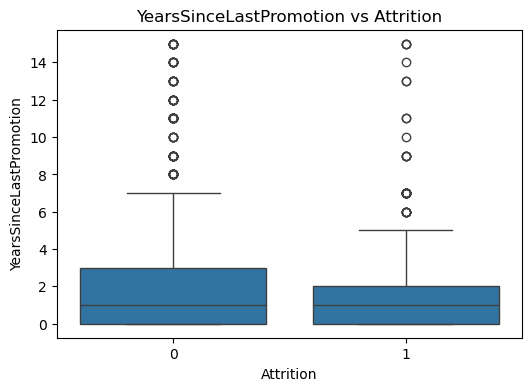

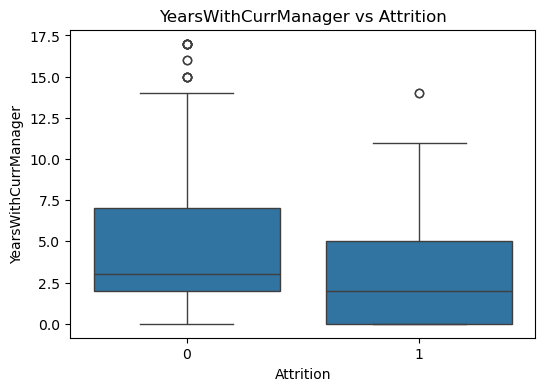

In [1330]:
# Outliers-extreme values

outlier_cols = [
    'Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked',
    'PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear',
    'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
    'YearsWithCurrManager'
]

for col in outlier_cols: 
    plt.figure(figsize=(6,4)) 
    sns.boxplot(x='Attrition', y=col, data=data) 
    plt.title(f'{col} vs Attrition') 
    plt.show()

In [1331]:
# Outlier handling

outlier_cols = [
    'Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked',
    'PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear',
    'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
    'YearsWithCurrManager'
]


for col in outlier_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    data[col] = data[col].clip(lower, upper) #capping

## FEATURE ENGINEERING

In [1332]:
# PERFORMANCE METRICS- Stability Score

data['StabilityScore'] = (
    (data['YearsInCurrentRole'] + data['YearsWithCurrManager'])
    / data['YearsAtCompany']
)

In [1333]:
data['StabilityScore']

0       1.500000
1       1.400000
2            NaN
3       0.875000
4       2.000000
          ...   
1465    1.000000
1466    2.000000
1467    0.833333
1468    1.555556
1469    1.250000
Name: StabilityScore, Length: 1470, dtype: float64

In [1334]:
data.isna().sum()

Age                          0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInC

In [1335]:
data['StabilityScore'].fillna(data['StabilityScore'].median(), inplace=True)

In [1336]:
data['StabilityScore'].value_counts()

StabilityScore
1.000000    182
0.000000    145
2.000000    139
1.333333    128
1.250000    105
           ... 
0.928571      1
0.388889      1
1.733333      1
1.382353      1
1.470588      1
Name: count, Length: 101, dtype: int64

In [1337]:
# Engagement Score

engagement_cols = [
    'JobSatisfaction',
    'EnvironmentSatisfaction',
    'RelationshipSatisfaction',
    'WorkLifeBalance'
]

data['EngagementScore'] = data[engagement_cols].mean(axis=1)

In [1338]:
data['EngagementScore'].value_counts()

EngagementScore
2.75    272
3.00    265
2.50    239
2.25    196
3.25    185
3.50    106
2.00     98
1.75     38
3.75     35
1.50     23
4.00      6
1.25      6
1.00      1
Name: count, dtype: int64

In [1339]:
data.select_dtypes(['object'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [1340]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [1341]:
data.drop([
    'DailyRate','HourlyRate','MonthlyRate',
    'EmployeeCount','EmployeeNumber','StandardHours','Over18'], axis=1, inplace=True)

In [1342]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   object 
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   object 
 7   EnvironmentSatisfaction   1470 non-null   int64  
 8   Gender                    1470 non-null   object 
 9   JobInvolvement            1470 non-null   int64  
 10  JobLevel                  1470 non-null   int64  
 11  JobRole                   1470 non-null   object 
 12  JobSatisfaction           1470 non-null   int64  
 13  MaritalStatus             1470 non-null   object 
 14  MonthlyI

In [1343]:
data.select_dtypes(['object'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


## TARGET & FEATURE

In [1344]:
selected_features = [
    'Age','Gender', 'MaritalStatus',
    'Education', 'EducationField',
    'Department', 'JobRole', 'JobLevel',
    'BusinessTravel', 'DistanceFromHome', 'OverTime',
    'MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel',
    'TotalWorkingYears', 'NumCompaniesWorked',
    'YearsSinceLastPromotion','StabilityScore',
    'TrainingTimesLastYear','EngagementScore',
    'JobInvolvement', 'PerformanceRating'
]

In [1345]:
x = data[selected_features]   # features 
y = data['Attrition']         # target


In [1346]:
print(x.shape)
print(y.shape)


(1470, 22)
(1470,)


In [1347]:
x.columns

Index(['Age', 'Gender', 'MaritalStatus', 'Education', 'EducationField',
       'Department', 'JobRole', 'JobLevel', 'BusinessTravel',
       'DistanceFromHome', 'OverTime', 'MonthlyIncome', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'NumCompaniesWorked',
       'YearsSinceLastPromotion', 'StabilityScore', 'TrainingTimesLastYear',
       'EngagementScore', 'JobInvolvement', 'PerformanceRating'],
      dtype='object')

## ENCODING

In [1348]:
cat_cols = [
    'MaritalStatus',
    'EducationField',
    'Department',
    'JobRole',
    'BusinessTravel',
    'OverTime'
]

num_cols = [
    'Age', 'Education', 'JobLevel', 'DistanceFromHome',
    'MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel',
    'TotalWorkingYears', 'NumCompaniesWorked',
    'YearsSinceLastPromotion', 'StabilityScore',
    'TrainingTimesLastYear', 'EngagementScore',
    'JobInvolvement', 'PerformanceRating'
]

In [1349]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)


## TRAIN & TEST SPLIT

In [1350]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

## MODEL TRAINING

In [1351]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

## LOGISTIC REGRESSION

In [1352]:
logreg_pipeline = Pipeline([
    ('preprocess', preprocessor), 
    ('model', LogisticRegression(max_iter=1000))
])

# Fit
logreg_pipeline.fit(x_train, y_train)

# Predict
y_pred_logreg = logreg_pipeline.predict(x_test)


# Evaluate
from sklearn.metrics import accuracy_score, f1_score, classification_report
print("---Logistic Regression---")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg, average='weighted'))
print(classification_report(y_test, y_pred_custom))

---Logistic Regression---
Accuracy: 0.8741496598639455
F1 Score: 0.852800330989395
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       246
           1       0.17      0.17      0.17        48

    accuracy                           0.73       294
   macro avg       0.50      0.50      0.50       294
weighted avg       0.73      0.73      0.73       294



## DECISION TREE 

In [1353]:
dt_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
])

# Fit
dt_pipeline.fit(x_train, y_train)

# Predict
y_pred_dt = dt_pipeline.predict(x_test)

# Evaluate
from sklearn.metrics import accuracy_score, f1_score, classification_report
print("---Decision Tree---")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print(classification_report(y_test, y_pred_dt))


---Decision Tree---
Accuracy: 0.8197278911564626
F1 Score: 0.8156821620460597
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       246
           1       0.44      0.40      0.42        48

    accuracy                           0.82       294
   macro avg       0.66      0.65      0.66       294
weighted avg       0.81      0.82      0.82       294



## RANDOM CLASSIFIER

In [1354]:
rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(n_estimators=200, random_state=42,class_weight='balanced'))
])
# Fit
rf_pipeline.fit(x_train, y_train)

# Predict
y_pred_rf = rf_pipeline.predict(x_test)

# Evaluate
print("---Random Forest---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))
print(classification_report(y_test, y_pred_rf))

---Random Forest---
Accuracy: 0.8605442176870748
F1 Score: 0.8179569181225865
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       246
           1       0.89      0.17      0.28        48

    accuracy                           0.86       294
   macro avg       0.87      0.58      0.60       294
weighted avg       0.86      0.86      0.82       294



## ROC- AUC- Logistic Regression

Logistic Regression ROC-AUC Score: 0.809789972899729


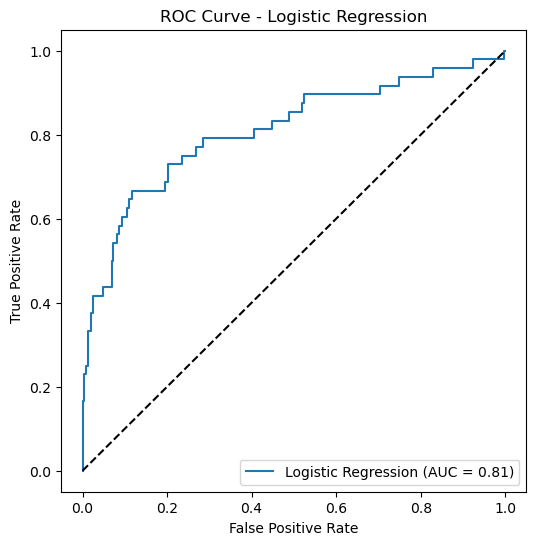

In [1355]:
# ROC-AUC comparison

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities
y_pred = logreg_pipeline.predict_proba(x_test)[:, 1]   # probability for positive class

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("Logistic Regression ROC-AUC Score:", roc_auc)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

## CONFUSION MATRIX- Logistic Regression

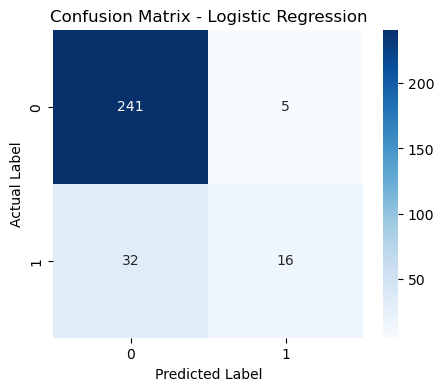

In [1356]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred = logreg_pipeline.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


## SAVING AS PICKLE FILE

In [1357]:
import pickle

# Save the pipeline
with open("logreg_pipeline.pkl", "wb") as f:
    pickle.dump(logreg_pipeline, f)

print("Logistic Regression saved successfully!")

Logistic Regression saved successfully!


In [1358]:
# Save cleaned DataFrame to CSV

data.to_csv("cleaned_empl_data.csv", index = False)

emp_data = pd.read_csv("cleaned_empl_data.csv")
pd.set_option("display.max_column", None)
emp_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,StabilityScore,EngagementScore
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,5993,8.0,Yes,11,3,1,0,8.0,0.5,1,6,4.0,0.0,5.0,1.500,2.00
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,5130,1.0,No,23,4,4,1,10.0,3.0,3,10,7.0,1.0,7.0,1.400,3.00
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,3,Single,2090,6.0,Yes,15,3,2,0,7.0,3.0,3,0,0.0,0.0,0.0,1.250,3.00
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,2909,1.0,Yes,11,3,3,0,8.0,3.0,3,8,7.0,3.0,0.0,0.875,3.25
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,3468,8.5,No,12,3,4,1,6.0,3.0,3,2,2.0,2.0,2.0,2.000,2.50
